# Creating an Ideal Portfolio
We want to create a top performing portfolio with only the top two industries that have the highest cumulative returns 

In [1]:
# Import libraries 
import pandas as pd
import csv 
from pathlib import Path

In [4]:
# Calculate the Average of all Cumulative returns 
Data1 = Path("cumulative_returns_data.csv")
cumulative1_df = pd.read_csv(Data1)

Data2 = Path("cumulative_returns_data2.csv")
cumulative2_df = pd.read_csv(Data2)

Data3 = Path("cumulative_returns_data3.csv")
cumulative3_df = pd.read_csv(Data3)

Data4 = Path("cumulative_returns_data4.csv")
cumulative4_df = pd.read_csv(Data4)

Data5 = Path("cumulative_returns_data5.csv")
cumulative5_df = pd.read_csv(Data5)

In [5]:
# Combine all cumulative returns data 
combined_df = pd.concat([cumulative1_df,cumulative2_df,cumulative3_df,cumulative4_df,cumulative5_df], axis='rows')

# Display the combined DataFrame
combined_df.head()

,Tech,Health,Finance,Consumer,Energy,Weapons
0,1.011021,1.017561,0.996315,1.001763,0.988372,0.990973
1,1.017345,1.015743,0.998180,1.018728,0.978101,1.000199
2,1.023009,1.007050,0.987742,1.034247,0.978239,1.004482
3,1.024626,1.040404,0.997211,1.053309,0.983311,1.027965
4,1.023928,1.042400,1.007688,1.041599,0.979630,1.027069


In [6]:
# Assuming df is your DataFrame containing the data
# Extract the "Tech" columns
tech_columns = combined_df.filter(like='Tech')

# Calculate the average of the "Tech" columns
tech_average = tech_columns.mean()

print(tech_average)

Tech    1.158431
dtype: float64


In [7]:
# Assuming df is your DataFrame containing the data
# Extract the "Health" columns
health_columns = combined_df.filter(like='Health')

# Calculate the average of the "Tech" columns
health_average = health_columns.mean()

print(health_average)

Health    1.114549
dtype: float64


In [8]:
# Assuming df is your DataFrame containing the data
# Extract the "Finance" columns
finance_columns = combined_df.filter(like='Finance')

# Calculate the average of the "Tech" columns
finance_average = finance_columns.mean()

print(finance_average)

Finance    1.112999
dtype: float64


In [9]:
# Assuming df is your DataFrame containing the data
# Extract the "Consumer" columns
consumer_columns = combined_df.filter(like='Consumer')

# Calculate the average of the "Tech" columns
consumer_average = consumer_columns.mean()

print(consumer_average)

Consumer    1.071783
dtype: float64


In [10]:
# Assuming df is your DataFrame containing the data
# Extract the "Energy" columns
energy_columns = combined_df.filter(like='Energy')

# Calculate the average of the "Tech" columns
energy_average = energy_columns.mean()

print(energy_average)

Energy    1.042131
dtype: float64


In [11]:
# Assuming df is your DataFrame containing the data
# Extract the "Weapons" columns
weapons_columns = combined_df.filter(like='Weapons')

# Calculate the average of the "Tech" columns
weapons_average = weapons_columns.mean()

print(weapons_average)

Weapons    1.104448
dtype: float64


# Conclusions: Top Performing Industries 
1. Tech = 0.97 
2. Health and Finance = Both tied at 0.94 
3. Consumer = 0.91 
4. Weapons = 0.87 
4. Energy = 0.84 

# Monte Carlo Simulations

In [12]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [13]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

In [14]:
# Specify the path to your .env file
dotenv_path = 'api.env'

# Load .env enviroment variables
load_dotenv(dotenv_path)

# Load environment variables
load_dotenv(dotenv_path)

# Access Alpaca API key ID
alpaca_api_key_id = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key_id,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AAPL","GOOG","MSFT","JNJ","PFE","UNH","JPM","BAC","V"]

timeframe = "1Day"

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data 
df_ticker.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2018-10-31 04:00:00+00:00,218.86,220.45,216.62,301129,216.88,42444508,218.856231,AAPL
2018-11-01 04:00:00+00:00,222.22,222.36,216.81,505926,219.05,59915448,217.683523,AAPL
2018-11-02 04:00:00+00:00,207.48,213.65,205.43,756041,209.55,95135063,208.088580,AAPL
2018-11-05 05:00:00+00:00,201.59,204.39,198.17,569649,204.26,68848036,200.964339,AAPL
2018-11-06 05:00:00+00:00,203.77,204.72,201.69,253890,201.92,34030512,203.264572,AAPL


In [16]:
df_ticker.tail(15)

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-11 04:00:00+00:00,235.68,238.5050,234.890,75000,237.55,4760892,236.083799,V
2023-10-12 04:00:00+00:00,236.78,237.7300,234.890,80688,236.71,4472922,236.477400,V
2023-10-13 04:00:00+00:00,237.67,238.6500,236.230,85730,236.39,4966927,237.320475,V
2023-10-16 04:00:00+00:00,240.07,240.7100,238.330,84834,239.00,6227476,239.845023,V
2023-10-17 04:00:00+00:00,241.20,241.4800,238.290,79450,239.63,4527631,240.424582,V
2023-10-18 04:00:00+00:00,237.47,240.8300,236.990,89593,239.96,9528489,237.882535,V
2023-10-19 04:00:00+00:00,233.81,237.9200,233.405,110145,237.47,5927441,234.973479,V
2023-10-20 04:00:00+00:00,233.38,235.7700,232.640,89456,234.13,5748423,233.692302,V
2023-10-23 04:00:00+00:00,231.53,234.4600,231.280,89024,231.36,5071711,232.691983,V


In [17]:
# Reorganize the DataFrame
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
GOOG = df_ticker[df_ticker['symbol']=='GOOG'].drop('symbol', axis=1)
MSFT = df_ticker[df_ticker['symbol']=='MSFT'].drop('symbol', axis=1)
JNJ = df_ticker[df_ticker['symbol']=='JNJ'].drop('symbol', axis=1)
PFE = df_ticker[df_ticker['symbol']=='PFE'].drop('symbol', axis=1)
UNH = df_ticker[df_ticker['symbol']=='UNH'].drop('symbol', axis=1)
JPM = df_ticker[df_ticker['symbol']=='JPM'].drop('symbol', axis=1)
BAC = df_ticker[df_ticker['symbol']=='BAC'].drop('symbol', axis=1)
V = df_ticker[df_ticker['symbol']=='V'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AAPL,GOOG,MSFT,JNJ,PFE,UNH,JPM,BAC,V], axis=1, keys=["AAPL","GOOG","MSFT","JNJ","PFE","UNH","JPM","BAC","V"])

# Display sample data
df_ticker.head()

AAPL                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-10-31 04:00:00+00:00  218.86  220.45  216.62      301129  216.88   
2018-11-01 04:00:00+00:00  222.22  222.36  216.81      505926  219.05   
2018-11-02 04:00:00+00:00  207.48  213.65  205.43      756041  209.55   
2018-11-05 05:00:00+00:00  201.59  204.39  198.17      569649  204.26   
2018-11-06 05:00:00+00:00  203.77  204.72  201.69      253890  201.92   

                                                    GOOG                     \
                             volume        vwap    close      high      low   
timestamp                                                                     
2018-10-31 04:00:00+00:00  42444508  218.856231  1076.77  1091.940  1057.00   
2018-11-01 04:00:00+00:00  59915448  217.683523  1070.00  1083.975  1062.46   
2018-11-02 04:00:00+00:00  95135063  208.088580  1057.79  1082.975  1054.61   
2018-11-05 05:00:00+00:00  68848036  200.964339  1040.09  1058.470  1021.24   
2018-11-06 05:00:00+00:00  34030512  203.264572  1055.81  1064.345  1038.07   

                           ...    BAC                             V            \
                           ...   open     volume       vwap   close      high   
timestamp                  ...                                                  
2018-10-31 04:00:00+00:00  ...  27.06  100829076  27.559997  137.85  139.1200   
2018-11-01 04:00:00+00:00  ...  27.77   53269150  27.779776  140.83  140.8700   
2018-11-02 04:00:00+00:00  ...  28.01   72947599  27.868507  139.78  141.4546   
2018-11-05 05:00:00+00:00  ...  27.95   46601234  28.072948  139.80  140.2100   
2018-11-06 05:00:00+00:00  ...  28.02   48358851  28.089798  140.79  140.9100   

                                                                             
                              low trade_count    open    volume        vwap  
timestamp                                                                    
2018-10-31 04:00:00+00:00  134.99      112011  134.99  14536840  137.814819  
2018-11-01 04:00:00+00:00  137.49       94137  139.10  19763054  140.303124  
2018-11-02 04:00:00+00:00  137.85       91637  141.11  22543939  139.629106  
2018-11-05 05:00:00+00:00  138.07       63041  139.80   6828165  139.367560  
2018-11-06 05:00:00+00:00  139.72       49355  139.80   5152556  140.463290  

[5 rows x 63 columns]

In [18]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["AAPL"] = df_ticker["AAPL"]["close"]
df_closing_prices["GOOG"] = df_ticker["GOOG"]["close"]
df_closing_prices["MSFT"] = df_ticker["MSFT"]["close"]
df_closing_prices["JNJ"] = df_ticker["JNJ"]["close"]
df_closing_prices["PFE"] = df_ticker["PFE"]["close"]
df_closing_prices["UNH"] = df_ticker["UNH"]["close"]
df_closing_prices["JPM"] = df_ticker["JPM"]["close"]
df_closing_prices["BAC"] = df_ticker["BAC"]["close"]
df_closing_prices["V"] = df_ticker["V"]["close"]

# Check for NaN values in the 'V' column
# You need to explain 
v_nan_indices = df_closing_prices['V'].isna()
average_V = df_closing_prices['V'].mean()
df_closing_prices['V'] = df_closing_prices['V'].fillna(average_V)

# If there are NaN values, fill them with the average closing price
#if v_nan_indices.any():
    #average_v_closing_price = df_closing_prices["V"].mean()
    #df_closing_prices.loc[v_nan_indices, "V"] = average_v_closing_price

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Ensure the index is in datetime format
df_closing_prices.index = pd.to_datetime(df_closing_prices.index)

df_closing_prices 

,AAPL,GOOG,MSFT,JNJ,PFE,UNH,JPM,BAC,V
2018-10-31,218.86,1076.77,106.81,139.99,43.06,261.35,109.02,27.50,137.85
2018-11-01,222.22,1070.00,105.92,140.82,43.67,260.93,108.98,27.81,140.83
2018-11-02,207.48,1057.79,106.16,140.68,42.93,261.01,108.38,27.89,139.78
2018-11-05,201.59,1040.09,107.51,142.20,43.52,261.01,109.09,28.06,139.80
2018-11-06,203.77,1055.81,107.72,142.57,43.01,263.54,109.60,28.21,140.79
...,...,...,...,...,...,...,...,...,...
2023-10-25,171.10,126.67,340.67,151.57,30.73,530.21,140.40,25.55,236.85
2023-10-26,166.89,123.44,327.89,149.00,31.16,528.36,140.76,26.12,231.28
2023-10-27,168.22,123.40,329.81,145.60,30.11,524.66,135.69,25.17,229.27
2023-10-30,170.29,125.75,337.31,147.03,30.55,529.99,137.42,25.69,233.08


In [36]:
# Configuring a Monte Carlo simulation to forecast 2 years cumulative returns
# Weights for each stock are assumed to be equal 
MC_two_year = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = 200,
    num_trading_days = 252*2
)

In [20]:
# Printing the simulation input data
MC_two_year.portfolio_data.head()

AAPL                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-10-31 04:00:00+00:00  218.86  220.45  216.62      301129  216.88   
2018-11-01 04:00:00+00:00  222.22  222.36  216.81      505926  219.05   
2018-11-02 04:00:00+00:00  207.48  213.65  205.43      756041  209.55   
2018-11-05 05:00:00+00:00  201.59  204.39  198.17      569649  204.26   
2018-11-06 05:00:00+00:00  203.77  204.72  201.69      253890  201.92   

                                                                 GOOG  \
                             volume        vwap daily_return    close   
timestamp                                                               
2018-10-31 04:00:00+00:00  42444508  218.856231          NaN  1076.77   
2018-11-01 04:00:00+00:00  59915448  217.683523     0.015352  1070.00   
2018-11-02 04:00:00+00:00  95135063  208.088580    -0.066331  1057.79   
2018-11-05 05:00:00+00:00  68848036  200.964339    -0.028388  1040.09   
2018-11-06 05:00:00+00:00  34030512  203.264572     0.010814  1055.81   

                                     ...        BAC                    V  \
                               high  ...       vwap daily_return   close   
timestamp                            ...                                   
2018-10-31 04:00:00+00:00  1091.940  ...  27.559997          NaN  137.85   
2018-11-01 04:00:00+00:00  1083.975  ...  27.779776     0.011273  140.83   
2018-11-02 04:00:00+00:00  1082.975  ...  27.868507     0.002877  139.78   
2018-11-05 05:00:00+00:00  1058.470  ...  28.072948     0.006095  139.80   
2018-11-06 05:00:00+00:00  1064.345  ...  28.089798     0.005346  140.79   

                                                                           \
                               high     low trade_count    open    volume   
timestamp                                                                   
2018-10-31 04:00:00+00:00  139.1200  134.99      112011  134.99  14536840   
2018-11-01 04:00:00+00:00  140.8700  137.49       94137  139.10  19763054   
2018-11-02 04:00:00+00:00  141.4546  137.85       91637  141.11  22543939   
2018-11-05 05:00:00+00:00  140.2100  138.07       63041  139.80   6828165   
2018-11-06 05:00:00+00:00  140.9100  139.72       49355  139.80   5152556   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-10-31 04:00:00+00:00  137.814819          NaN  
2018-11-01 04:00:00+00:00  140.303124     0.021618  
2018-11-02 04:00:00+00:00  139.629106    -0.007456  
2018-11-05 05:00:00+00:00  139.367560     0.000143  
2018-11-06 05:00:00+00:00  140.463290     0.007082  

[5 rows x 72 columns]

In [23]:
# Running a Monte Carlo simulation to forecast 2 years cumulative returns
MC_two_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000238,1.012949,1.007922,1.006221,1.007468,1.015895,1.003417,1.004827,0.993868,0.996591,...,0.994714,0.989178,0.998598,0.998324,0.991127,1.010496,1.005020,1.007246,1.009258,0.997274
2,1.007700,1.005361,1.006836,0.980152,1.005978,1.008336,0.994469,1.018548,0.976631,0.998579,...,0.992734,0.989160,0.997397,1.005936,0.985500,1.005583,1.005942,1.017278,1.007986,0.998961
3,1.009797,1.005397,1.006673,0.980281,1.007465,0.996488,0.992486,1.025508,0.969225,0.996406,...,0.983433,0.989280,0.990208,1.008024,0.975925,1.008597,1.001080,1.012328,1.005745,0.995775
4,1.004886,1.010227,1.000940,0.963322,1.007512,0.994659,0.998764,1.029776,0.954645,1.003917,...,0.984433,0.981780,0.996982,1.015606,0.988983,1.018138,1.010275,1.004094,1.014658,1.011610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.056651,1.376306,1.068170,1.203492,1.158735,1.206673,1.393662,1.128302,1.121829,1.339295,...,1.453319,1.238134,1.341626,1.282970,1.333748,1.111638,1.443340,1.470827,1.175947,1.685072
501,1.055318,1.379343,1.057991,1.209199,1.152325,1.211292,1.399781,1.140441,1.116295,1.322958,...,1.437354,1.238586,1.347988,1.302962,1.339266,1.111400,1.436516,1.457965,1.166340,1.684414
502,1.053745,1.390476,1.054215,1.200607,1.167450,1.206380,1.382371,1.127434,1.117114,1.311210,...,1.441633,1.244012,1.352497,1.307556,1.333068,1.104916,1.423653,1.458489,1.169135,1.683808
503,1.053998,1.395567,1.049317,1.213698,1.171907,1.198443,1.382436,1.139691,1.119687,1.318105,...,1.424568,1.256985,1.360913,1.299537,1.330122,1.094664,1.426202,1.473139,1.172074,1.692668


<Figure size 1200x800 with 0 Axes>

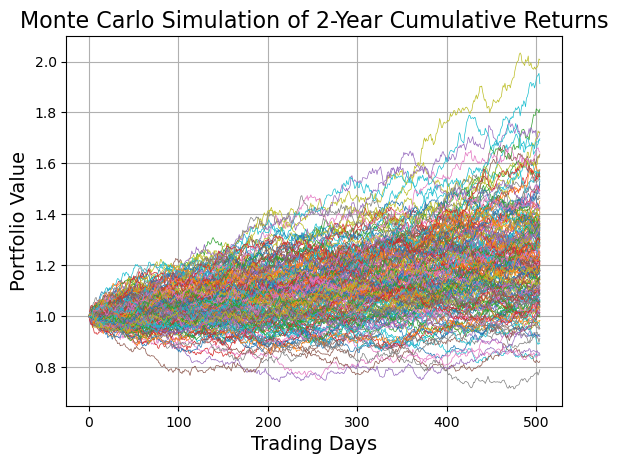

In [29]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Get the matplotlib Axes object
ax = MC_two_year.plot_simulation()

# Customize the plot
for line in ax.lines:
    line.set_linewidth(0.5)  # Adjust line width

# Set title and labels
plt.title('Monte Carlo Simulation of 2-Year Cumulative Returns', fontsize=16)
plt.xlabel('Trading Days', fontsize=14)
plt.ylabel('Portfolio Value', fontsize=14)

# Add grid
plt.grid(True)

# Show plot
plt.show()

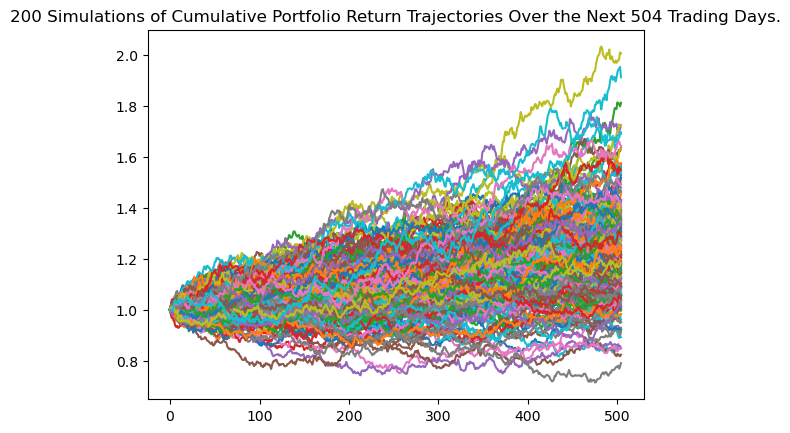

In [27]:
# Plot simulation outcomes
line_plot = MC_two_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_two_year_sim_plot.png", bbox_inches="tight")


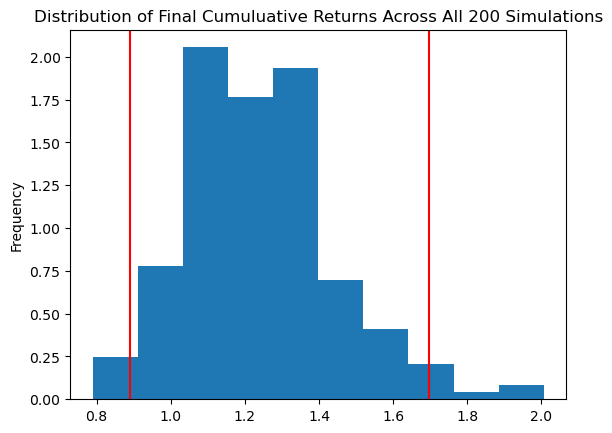

In [30]:
 # Plot probability distribution and confidence intervals
dist_plot = MC_two_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_two_year_dist_plot.png',bbox_inches='tight')

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_two_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           200.000000
mean              1.237577
std               0.201886
min               0.789968
25%               1.098450
50%               1.216307
75%               1.351887
max               2.006104
95% CI Lower      0.890609
95% CI Upper      1.697789
Name: 504, dtype: float64


In [35]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in the selected stocks

ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 2 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $100,000 in the portfolio over the next 2 years will end within in the range of $8906.09 and $16977.89


/var/folders/72/jrk85kms6q7_78yj5r80dnkw0000gn/T/ipykernel_21575/2207111584.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(tbl[8]*10000,2)
/var/folders/72/jrk85kms6q7_78yj5r80dnkw0000gn/T/ipykernel_21575/2207111584.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(tbl[9]*10000,2)


# Sharpe Ratios Average Before Each Midterm 